# Algoritmo DBSCAN

Este é um dos algoritmos de clusterização (agrupamento). Sua característica principal é agrupar os dados de acordo com a sua densidade. Dados com densidades muito variadas prejudicam o desempenho do DBSCAN. A estrutura deste algoritmo é:

- **Ponto Central:** é determinado pelo número mínimo de pontos ao redor;
- **Ponto de Fronteira:** é determinado pela ausência do número mínimo de pontos ao redor, contudo ainda está próximo do ponto central, mas não pode ser um ponto central de outro agrupamento por não ter o número mínimo de pontos ao redor;
- **Nós:** são os pontos classificados como outliers, ou seja, não são pontos centrais e nem de fronteira. O DBSCAN lida bem com os pontos outliers.
- **Raio:** é o parâmetro que define a procura dos pontos ao redor, ou seja, para que um ponto seja considerado central, os pontos ao redor devem obedecer a distância do raio.

Tanto o número mínimo de pontos quanto o raio são determinados pela equipe de Cientistas de Dados, levando em considerando a base de dados. Após terminar de procurar todos os pontos centrais e fechar os agrupamentos, o DBSCAN busca pelos pontos de fronteiras e por último os outliers.

Em Python, o DBSCAN é acessado pela lib sklearn no módulo cluster que tem a classe DBSCAN. O construtor da classe recebe os seguintes parâmetros:

- **eps:** raio;
- **min_samples:** número de pontos mínimos;

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.datasets import make_blobs # cria datasets sintéticos
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="pastel")

## Criando agrupamento

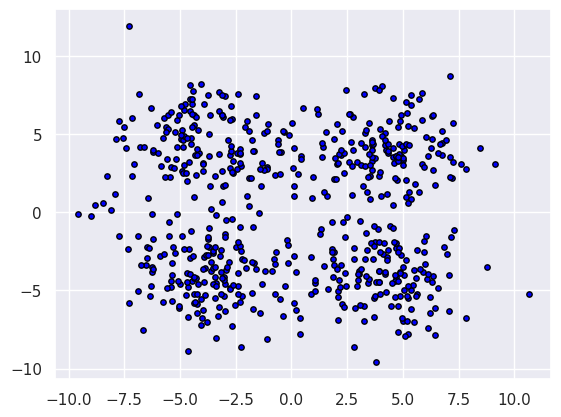

In [ ]:
centers =[(-4, -4), (-4, 4), (4, -4), (4, 4)]
cluster_std = 2

X, y = make_blobs(n_samples=600,
                  cluster_std=cluster_std,
                  centers=centers,
                  n_features=2,
                  random_state=1)

plt.scatter(X[:,0], X[:,1], color="blue", edgecolors='black', s=15)
plt.show()

In [ ]:
X

array([[-2.79536144, -3.15943559],
       [-6.54511751, -3.37290456],
       [ 5.50267447, -3.71920913],
       ...,
       [-3.42882535, -2.22971767],
       [ 4.61963352, -1.89735846],
       [-3.16539599, -2.4304587 ]])

## Criando uma função de plotagem

In [ ]:
def plot_db(X, labels):
    df_db = pd.DataFrame(X)
    df_db['cluster'] = labels

    sns.scatterplot(data=df_db,
                    x=0, y=1,
                    hue="cluster",
                    palette="deep");

## Aplicando o algoritmo DBSCAN

In [ ]:
clustering = DBSCAN(eps=1, min_samples=7).fit(X) # algoritmo de DBSCAN sendo executado pelo fit()
labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # extraindo os grupos descartando os outliers
n_noise_ = list(labels).count(-1) # contando os outliers

print("Número de Clusters: %d" % n_clusters_)
print("Número de Ruídos: %d" % n_noise_)


Número de Clusters: 4
Número de Ruídos: 73


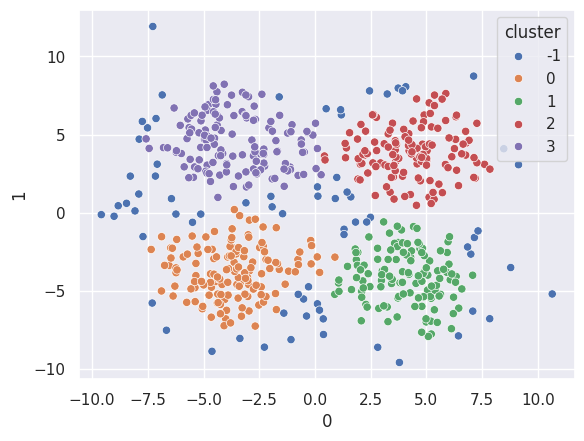

In [ ]:
plot_db(X, labels)